epochs=0, cost = 1.248005986213684, w1 = 0.17524050176143646, w2 = 0.4182035028934479, b = [0.3469044]
epochs=200, cost = 0.5744381546974182, w1 = -0.6396414637565613, w2 = -0.895504355430603, b = [0.7419376]
epochs=400, cost = 0.5183374285697937, w1 = -0.7835500240325928, w2 = -1.723294734954834, b = [0.5586072]
epochs=600, cost = 0.4971001148223877, w1 = -0.835095226764679, w2 = -2.2306246757507324, b = [0.47419143]
epochs=800, cost = 0.48706790804862976, w1 = -0.8549770712852478, w2 = -2.5695748329162598, b = [0.4264381]
epochs=1000, cost = 0.48166894912719727, w1 = -0.8634310960769653, w2 = -2.8087174892425537, b = [0.39452302]
epochs=1200, cost = 0.4785132110118866, w1 = -0.8677133917808533, w2 = -2.9835031032562256, b = [0.370349]
epochs=1400, cost = 0.4765567183494568, w1 = -0.8705120086669922, w2 = -3.114349603652954, b = [0.35041896]
epochs=1600, cost = 0.4752856194972992, w1 = -0.8728028535842896, w2 = -3.213979482650757, b = [0.33310425]
epochs=1800, cost = 0.474426388740539

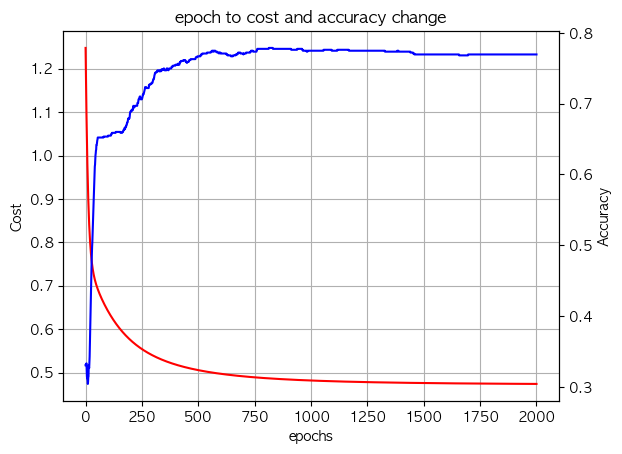

0.769433465085639


In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

data = np.loadtxt("data-03-diabetes.csv", delimiter = ',', dtype=np.float32)

x_data = data[:, 0:-1]
y_data = data[:, [-1]]

w = tf.Variable(tf.random.uniform([8 , 1], name='weight'))
b = tf.Variable(tf.random.uniform([1], name='bias'))

def hypothesis(w, b):
    return tf.sigmoid(tf.matmul(x_data, w) + b)

def cost():
    return -tf.reduce_mean(y_data * tf.math.log(hypothesis(w, b)) + (1-y_data)*tf.math.log(1-hypothesis(w, b)))

def graph():
    import matplotlib as mpl
    mpl.rc('font', family='AppleGothic')
    mpl.rc('axes', unicode_minus=False)
    fig, ax0 = plt.subplots()
    ax1 = ax0.twinx()
    ax0.set_title("epoch to cost and accuracy change")
    ax0.plot(cost_arr, 'r-', label="cost")
    ax0.set_ylabel("Cost")
    ax0.grid(True)
    ax1.plot(accuracy_arr, 'b', label="accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.grid(False)
    ax0.set_xlabel("epochs")
    plt.show()

opt = tf.keras.optimizers.SGD(learning_rate=0.1)
epoch_arr = []
cost_arr = []
accuracy_arr = []

for i in range(2001):
    with tf.GradientTape() as tape:
        current_cost = cost()
    grads = tape.gradient(current_cost, [w, b])
    opt.apply_gradients(zip(grads, [w, b]))
    if i % 200 == 0:
        print(f'epochs={i}, cost = {current_cost.numpy()}, w1 = {w.numpy()[0, 0]}, w2 = {w.numpy()[1, 0]}, b = {b.numpy()}')

    predicted = tf.cast(hypothesis(w, b) > 0.5, dtype=tf.float32)
    epoch_arr.append(i)
    cost_arr.append(current_cost.numpy())
    accuracy = np.mean(y_data == predicted)
    accuracy_arr.append(accuracy)
graph()
print(accuracy)